
# Machine Learning Internship task

Welcome folks, Thank you for applying for this internship and we are super excited to take this conversation ahead with you.

But before we go ahead, we would like you to go thru a small assessment, which will help us to evaluate you better on technical skills and working styles.


## Task Objective :
* [ ] Perform EDA on the given [data](https://github.com/geniusai-research/interns_task/blob/main/taskdata.csv).
* [ ] Build some new features which makes sense for the learning objective.
* [ ] Train any classifier (can be any model of your choice XGB,DNNs, etc) 
* [ ] Implement SHAP on this model to explain the decisions. (`Bonus points`) 
* [ ] Submit the task by creating a PR request on this [repository](https://github.com/geniusai-research/interns_task/).

## Instructions :
* Perform all the tasks mentioned above.
* Maintain a single **JupyterNotebook** which has all the descriptions and code in it. 
* Notebook needs to be properly structured .
* Code needs to reproducible.

**We will only accept the assignment if its in a single Notebook or else it will be rejected.**

## Important dates
The assignments needs to be completed in 1 week from today. <br>
**Deadline : 28th October**


If you have any issue then feel free to create issue on this [repository](https://github.com/geniusai-research/interns_task/) or reachout to us over the internshala chat.

<hr>

Cheers!!!  <br>
RK 


In [28]:
#importing the basics libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
#read csv file
df=pd.read_csv("taskdata.csv")
df.head()

user_id  account_id  max_return_days  average_return_days  \
0   410039       496.0                8             1.500000   
1   410240       499.0               37             8.200000   
2   411764       493.0                9             1.533333   
3   411985       262.0                1             1.000000   
4   412071       496.0                1             1.000000   

   customer_since_months  total_revenue  average_revenue  avg_vas_count  \
0                     14            0.0              0.0       3.666667   
1                     10            0.0              0.0       4.900000   
2                     15            0.0              0.0       5.333333   
3                     14            0.0              0.0       6.307692   
4                     18            0.0              0.0       5.846154   

   avg_used_vas_value  business_type  avg_wallet_bonus  avg_active_ads  \
0           66.666667              0             300.0       79.333333   
1          114.000000              0               0.0      232.100000   
2          106.666667              0             150.0       55.083333   
3          176.153846              0            1481.0      409.538462   
4          109.230769              0              41.5       48.230769   

   avg_new_ads  avg_email_replies  avg_call_replies  avg_sms_replies  target  
0    15.250000          32.416667         27.916667         0.250000       0  
1    18.300000          16.200000         13.800000         0.000000       0  
2     3.750000          20.250000         24.500000         0.000000       0  
3    80.769231          87.461538         57.615385         0.000000       1  
4     1.692308          17.461538         25.769231         0.230769       0

In [30]:
df.tail()

user_id  account_id  max_return_days  average_return_days  \
4402  73498690100       113.0                1                  1.0   
4403  73519239100      1017.0                1                  1.0   
4404  73525763100       226.0                1                  1.0   
4405  73538605100       226.0                1                  1.0   
4406  73560305100      1017.0                1                  1.0   

      customer_since_months  total_revenue  average_revenue  avg_vas_count  \
4402                      4           0.00             0.00            0.0   
4403                      2           0.00             0.00            0.0   
4404                      2           0.00             0.00            0.0   
4405                      2         551.19           551.19            7.0   
4406                      4           0.00             0.00            0.0   

      avg_used_vas_value  business_type  avg_wallet_bonus  avg_active_ads  \
4402                 0.0              3               0.0        4.666667   
4403                 0.0              4               0.0      153.000000   
4404                 0.0              1               0.0        0.000000   
4405                70.0              1               0.0       17.000000   
4406                 0.0              0             240.0        1.000000   

      avg_new_ads  avg_email_replies  avg_call_replies  avg_sms_replies  \
4402          2.0           9.666667         14.666667         0.333333   
4403         76.5           9.000000         11.500000         0.000000   
4404          0.0           0.000000          0.000000         0.000000   
4405         17.0          10.000000          8.000000         0.000000   
4406          1.0           0.000000          0.000000         0.000000   

      target  
4402       0  
4403       0  
4404       0  
4405       0  
4406       0

# EDA

In [31]:
df.isnull().sum()

user_id                  0
account_id               7
max_return_days          0
average_return_days      0
customer_since_months    0
total_revenue            0
average_revenue          0
avg_vas_count            0
avg_used_vas_value       0
business_type            0
avg_wallet_bonus         0
avg_active_ads           0
avg_new_ads              0
avg_email_replies        0
avg_call_replies         0
avg_sms_replies          0
target                   0
dtype: int64

In [32]:
df.shape

(4407, 17)

In [33]:
df['account_id'].value_counts()

1005.0    684
493.0     483
499.0     467
496.0     467
262.0     438
1017.0    436
113.0     290
226.0     275
111.0     248
112.0     148
364.0     134
517.0     112
202.0     111
115.0      73
116.0      34
Name: account_id, dtype: int64

In [34]:
# filling up the missing values
df['account_id']=df['account_id'].fillna(df['account_id'].mean())

In [35]:
df['account_id'].value_counts()

1005.000000    684
493.000000     483
499.000000     467
496.000000     467
262.000000     438
1017.000000    436
113.000000     290
226.000000     275
111.000000     248
112.000000     148
364.000000     134
517.000000     112
202.000000     111
115.000000      73
116.000000      34
506.553864       7
Name: account_id, dtype: int64

# Visualization

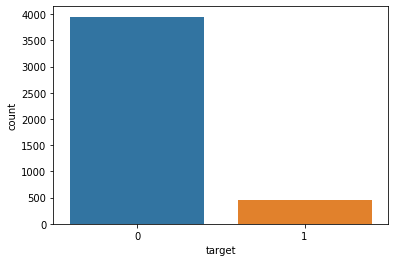

In [36]:
sns.countplot(x='target',data=df)

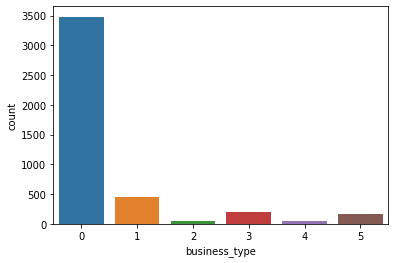

In [37]:
sns.countplot(x='business_type',data=df)

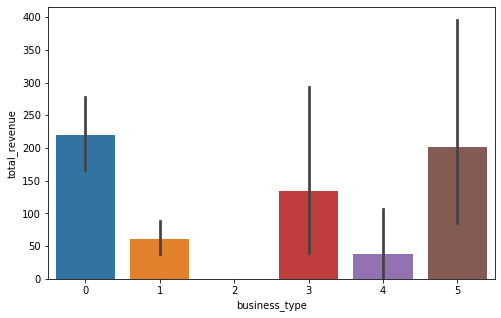

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(df['business_type'],df['total_revenue'])

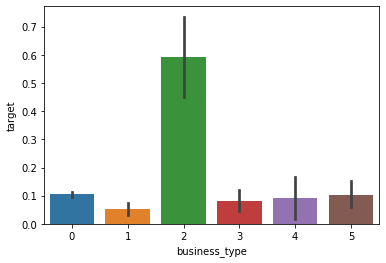

In [39]:
sns.barplot(df['business_type'],df['target'])

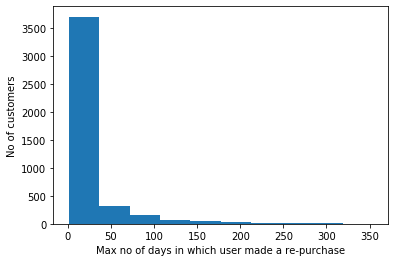

In [40]:
plt.hist(df['max_return_days'])
plt.xlabel('Max no of days in which user made a re-purchase')
plt.ylabel('No of customers')
plt.show()

([<matplotlib.patches.Wedge at 0x16c816c1d68>,
 [Text(0.8899186877588753, 0.6465637858537406, 'business_type'),
  Text(-0.8018655381043114, 0.7530017654698317, 'total_revenue'),
  Text(-0.224857475969789, -1.178744720242893, 'max_return_days'),
  Text(1.0227541568457088, -0.40493695145642544, 'customer_since_months')],
 [Text(0.4854101933230228, 0.35267115592022213, '20.0%'),
  Text(-0.43738120260235164, 0.41072823571081724, '36.0%'),
  Text(-0.1311668609823769, -0.6876010868083542, '32.0%'),
  Text(0.5578659037340229, -0.22087470079441385, '12.0%')])

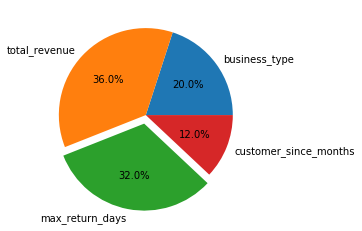

In [41]:
slices=[5,9,8,3]
plt.pie(slices,labels=['business_type','total_revenue','max_return_days','customer_since_months'],autopct='%1.1f%%',explode=(0,0,0.1,0))

([<matplotlib.patches.Wedge at 0x16c827acf60>,
 [Text(1.0391359982529484, 0.3608273508685956, 'avg_sms_replies'),
  Text(0.32590310130231726, 1.05061275861353, 'avg_call_replies'),
  Text(-0.8158173463450218, 0.7378631698374483, 'avg_email_replies'),
  Text(-1.0999999999999999, -2.5747358288378247e-08, 'avg_new_ads'),
  Text(-0.8632793143002754, -0.6817248898941907, 'avg_active_ads'),
  Text(-0.18296229382273976, -1.084677278751206, 'avg_wallet_bonus'),
  Text(0.5286399182147615, -0.9646449278723703, 'avg_used_vas_value'),
  Text(1.1336029071850344, -0.39362983731119583, 'average_revenue')],
 [Text(0.5668014535925172, 0.19681491865559755, '10.6%'),
  Text(0.17776532798308212, 0.5730615046982891, '19.1%'),
  Text(-0.4449912798245573, 0.4024708199113354, '17.0%'),
  Text(-0.5999999999999999, -1.4044013611842678e-08, '6.4%'),
  Text(-0.4708796259819683, -0.3718499399422858, '14.9%'),
  Text(-0.0997976148124035, -0.5916421520461124, '8.5%'),
  Text(0.2883490462989608, -0.5261699606576564, 

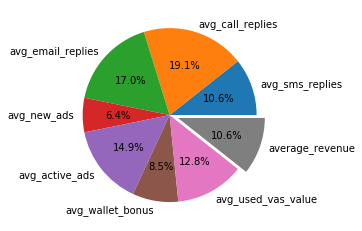

In [42]:
slices=[5,9,8,3,7,4,6,5]
plt.pie(slices,labels=['avg_sms_replies','avg_call_replies','avg_email_replies','avg_new_ads','avg_active_ads','avg_wallet_bonus','avg_used_vas_value','average_revenue'],autopct='%1.1f%%',explode=(0,0,0,0,0,0,0,0.1))

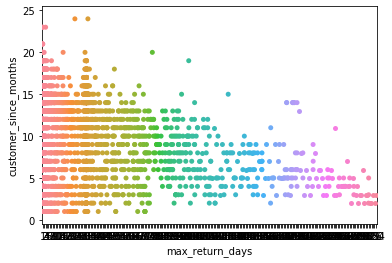

In [43]:
sns.stripplot(df['max_return_days'],df['customer_since_months'])

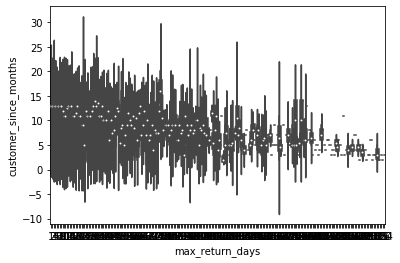

In [44]:
sns.violinplot(df['max_return_days'],df['customer_since_months'])

# Preparing the data

In [45]:
df['avg_replies']=df['avg_email_replies']+df['avg_call_replies']+df['avg_sms_replies']


In [46]:
df.drop(['avg_email_replies','avg_call_replies','avg_sms_replies','user_id','account_id'],axis=1, inplace=True)
df.head()

max_return_days  average_return_days  customer_since_months  total_revenue  \
0                8             1.500000                     14            0.0   
1               37             8.200000                     10            0.0   
2                9             1.533333                     15            0.0   
3                1             1.000000                     14            0.0   
4                1             1.000000                     18            0.0   

   average_revenue  avg_vas_count  avg_used_vas_value  business_type  \
0              0.0       3.666667           66.666667              0   
1              0.0       4.900000          114.000000              0   
2              0.0       5.333333          106.666667              0   
3              0.0       6.307692          176.153846              0   
4              0.0       5.846154          109.230769              0   

   avg_wallet_bonus  avg_active_ads  avg_new_ads  target  avg_replies  
0             300.0       79.333333    15.250000       0    60.583333  
1               0.0      232.100000    18.300000       0    30.000000  
2             150.0       55.083333     3.750000       0    44.750000  
3            1481.0      409.538462    80.769231       1   145.076923  
4              41.5       48.230769     1.692308       0    43.461538

In [47]:
X=df.drop(columns='target')
y=df.target

# Training the Algorithm and making prediction

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [49]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9010889292196007

# Using SHAP

In [50]:
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
shap_values=explainer.shap_values(X)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [51]:
shap.force_plot(explainer.expected_value, shap_values, X)

shap.plots.force is slow for many thousands of rows, try subsampling your data.


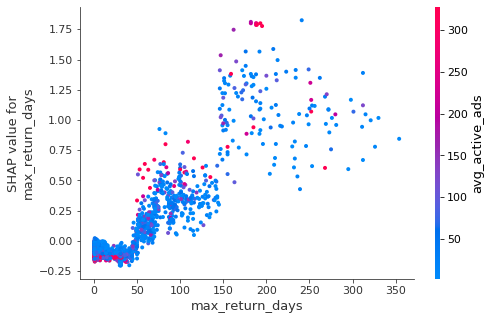

In [52]:
shap.dependence_plot("max_return_days", shap_values, X)

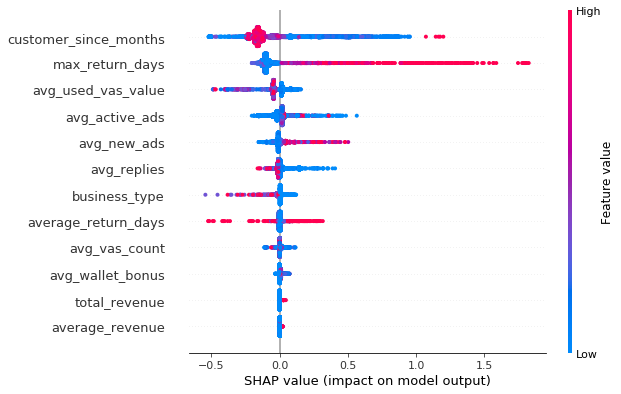

In [53]:
shap.summary_plot(shap_values, X)

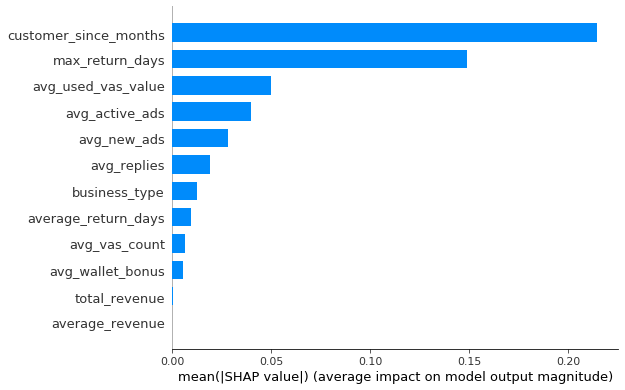

In [54]:
shap.summary_plot(shap_values, X, plot_type="bar")